In [195]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [196]:
df = pd.read_csv('credit_customers.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


## Data Analysis

In [197]:
df.shape

(1000, 21)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [199]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [200]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

<AxesSubplot:>

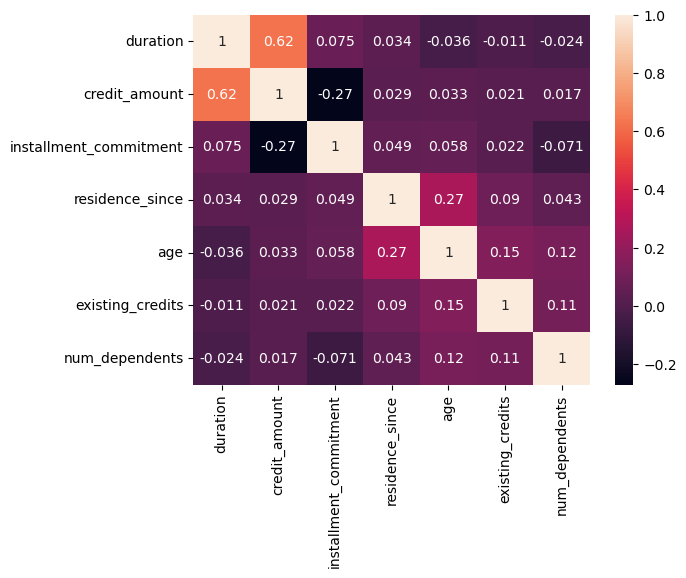

In [201]:
sns.heatmap(df.corr(),annot=True)

In [202]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


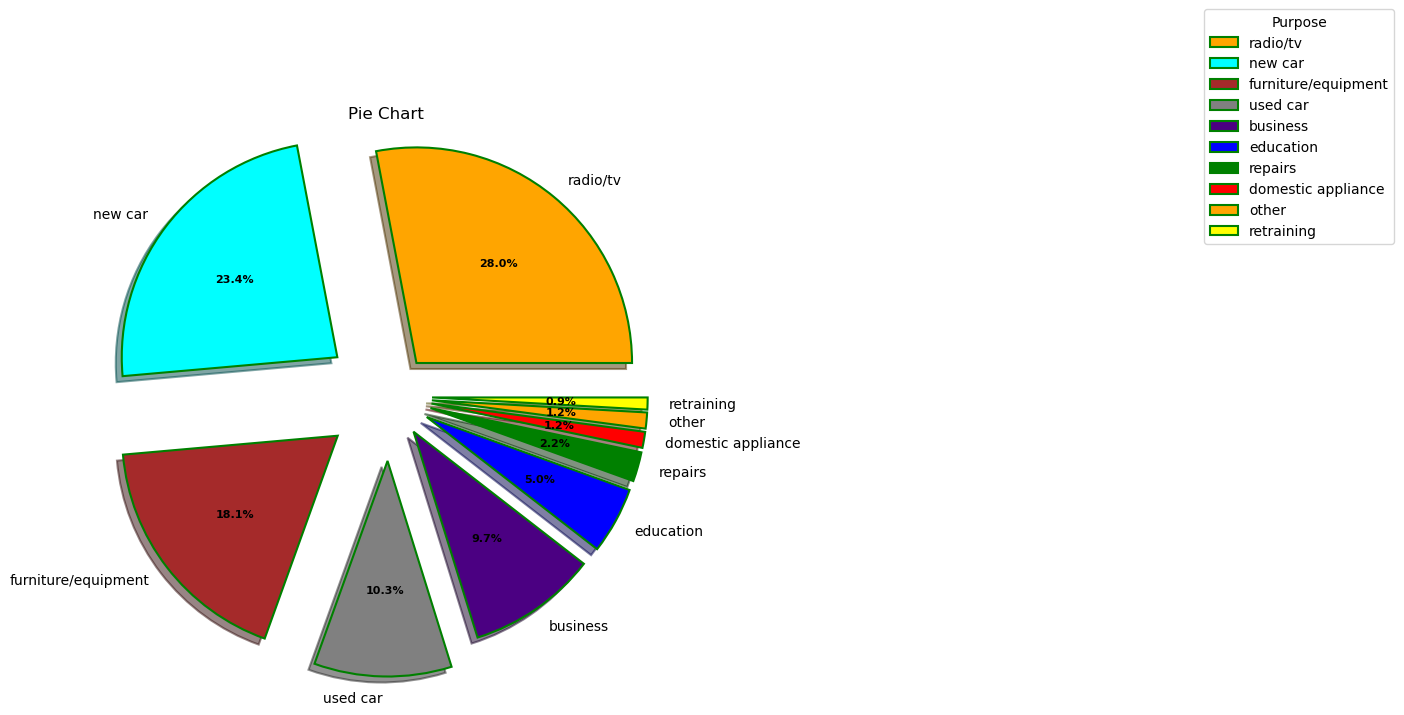

In [203]:
explode = (0.2, 0.3, 0.3, 0.3, 0.2, 0.2,0.2,0.2,0.2,0.2)
 
# color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "blue","green","red","orange","yellow")
 
wp = { 'linewidth' : 1.5, 'edgecolor' : "green" }
 

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(df['purpose'].value_counts(),
                                  autopct = "%.1f%%".format(df['purpose'].value_counts()),
                                  explode = explode,
                                  labels = df['purpose'].value_counts().index,
                                  shadow = True,
                                  colors = colors,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Legend
ax.legend(wedges,df['purpose'].value_counts().index ,
          title ="Purpose",
          loc ="center left",
          bbox_to_anchor =(2, 0.5, 0.5, 1))


plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Pie Chart ")


plt.show()

<AxesSubplot:xlabel='foreign_worker', ylabel='count'>

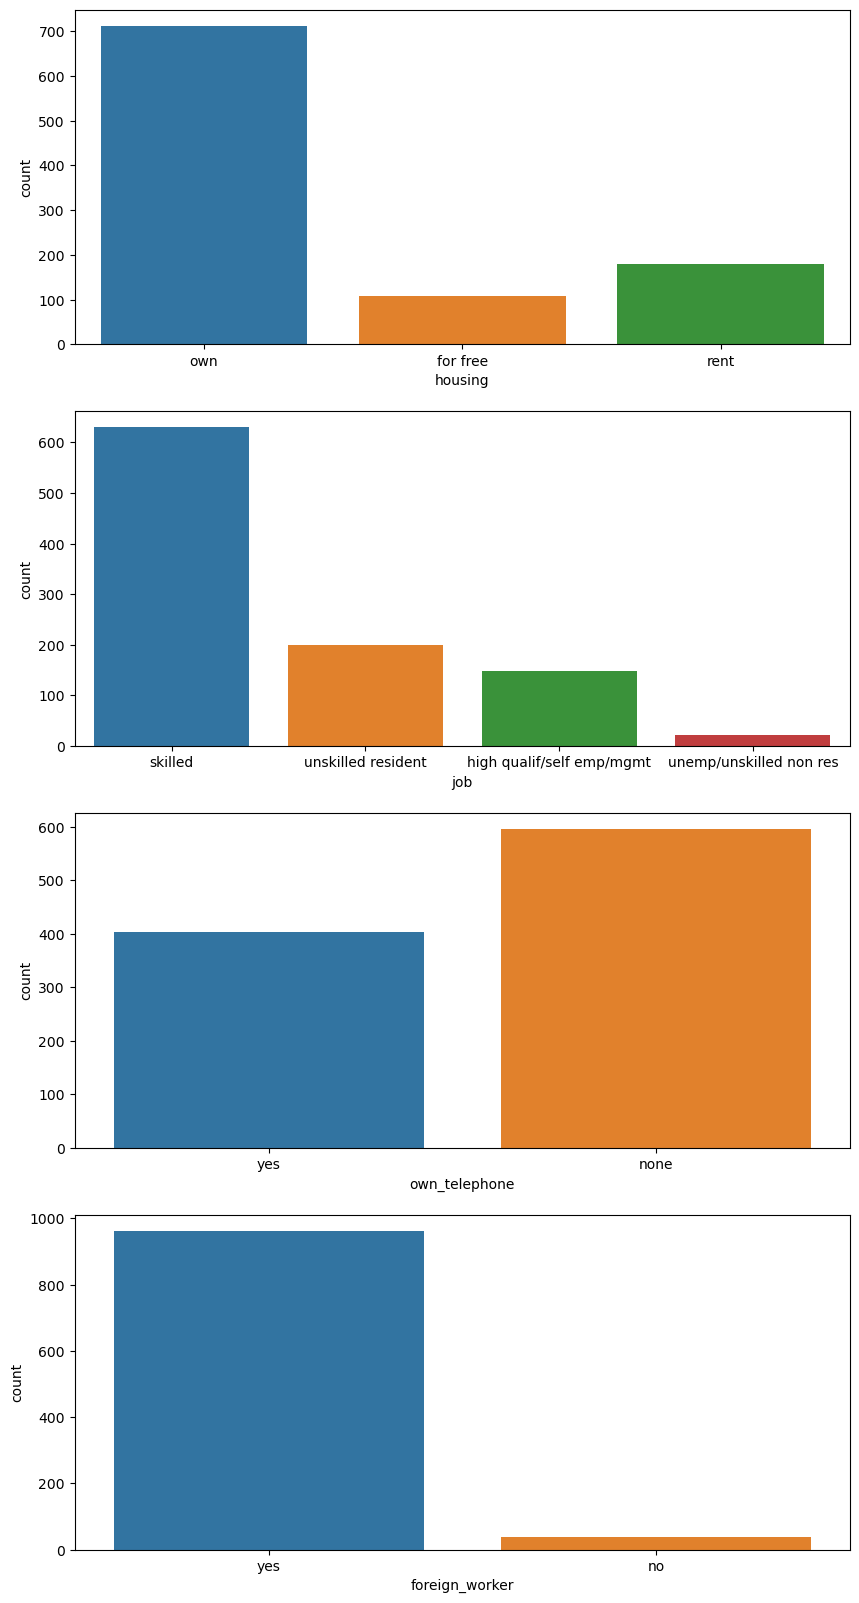

In [204]:
fig, ax = plt.subplots(4,1,figsize =(10, 20))

sns.countplot(x=df['housing'],ax=ax[0])
sns.countplot(x=df['job'],ax=ax[1])
sns.countplot(x=df['own_telephone'],ax=ax[2])
sns.countplot(x=df['foreign_worker'],ax=ax[3])

## Date Preparation

In [205]:
df['class']=LabelEncoder().fit_transform( df['class'])
df['foreign_worker']=LabelEncoder().fit_transform( df['foreign_worker'])
df['own_telephone']=LabelEncoder().fit_transform( df['own_telephone'])

In [206]:
dum = pd.get_dummies(df[['checking_status','credit_history',  'purpose', 'savings_status', 
                        'employment', 'personal_status', 'other_parties',
                        'residence_since', 'property_magnitude', 
                        'other_payment_plans', 'housing',
                        'job']],drop_first=True)

In [207]:
df = pd.concat([df, dum], axis = 1)
df = df.drop(['checking_status','credit_history',  'purpose', 'savings_status', 
                        'employment', 'personal_status', 'other_parties',
                        'residence_since', 'property_magnitude', 
                        'other_payment_plans', 'housing',
                        'job'],axis=1)

In [208]:
df.head()

,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents,own_telephone,foreign_worker,class,checking_status_<0,...,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident
0,6.0,1169.0,4.0,67.0,2.0,1.0,1,1,1,1,...,0,0,1,1,0,1,0,1,0,0
1,48.0,5951.0,2.0,22.0,1.0,1.0,0,1,0,0,...,0,0,1,1,0,1,0,1,0,0
2,12.0,2096.0,2.0,49.0,1.0,2.0,0,1,1,0,...,0,0,1,1,0,1,0,0,0,1
3,42.0,7882.0,2.0,45.0,1.0,2.0,0,1,1,1,...,1,0,0,1,0,0,0,1,0,0
4,24.0,4870.0,3.0,53.0,2.0,2.0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0


## Modeling

In [209]:
X = df.drop('class', axis = 1)
y = df['class']

In [210]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Naive Bayes

In [211]:
from sklearn.naive_bayes import GaussianNB

In [212]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [213]:
predicted = NBmodel.predict(X_test)

In [214]:
#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [215]:
cm = confusion_matrix(y_test,predicted)
score = accuracy_score(y_test,predicted)
cr = classification_report(y_test,predicted)
auc = roc_auc_score(y_test,predicted)
print('Confusion Matrix for Naive Bayes:''\n',cm )
print('Accuracy Score for Naive Bayes:',score )
print('Classification Report for Naive Bayes:''\n''\n',cr)
print('Auc Score for Naive Bayes:',auc)

Confusion Matrix for Naive Bayes:
 [[ 39  20]
 [ 33 108]]
Accuracy Score for Naive Bayes: 0.735
Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.54      0.66      0.60        59
           1       0.84      0.77      0.80       141

    accuracy                           0.73       200
   macro avg       0.69      0.71      0.70       200
weighted avg       0.75      0.73      0.74       200

Auc Score for Naive Bayes: 0.7134871979805266


### Decision Tree

In [218]:
from sklearn.tree import DecisionTreeClassifier

In [227]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [228]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.71


In [229]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.51      0.59      0.55        59
           1       0.82      0.76      0.79       141

    accuracy                           0.71       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.73      0.71      0.72       200



In [233]:
# Create Decision Tree classifer object usnig criteraton entropy
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.735


In [234]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.55      0.53      0.54        59
           1       0.81      0.82      0.81       141

    accuracy                           0.73       200
   macro avg       0.68      0.67      0.68       200
weighted avg       0.73      0.73      0.73       200



### Random Forest

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
rf = RandomForestClassifier(n_estimators = 10, random_state = None)
rf.fit(X_train,y_train);

In [237]:
y_pred = rf.predict(X_test)

In [238]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.59      0.58      0.58        59
           1       0.82      0.83      0.83       141

    accuracy                           0.76       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.75      0.76      0.75       200



In [239]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.755
